In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering


In [38]:
bank = pd.read_csv('data/CC GENERAL.csv')
bank.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [39]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Задание 7.2

Теперь приступим к анализу данных. По традиции начнём его с проверки данных на наличие пропущенных значений. Сколько всего пропусков в данных?

In [40]:
bank.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Задание 7.3

Заполните все пропуски средними арифметическими для признаков. Каким будет среднее арифметическое для признака MINIMUM_PAYMENTS (если считать после заполнения пропущенных значений)? Округлите результат до двух знаков после точки-разделителя.

In [41]:
bank['MINIMUM_PAYMENTS'] = bank['MINIMUM_PAYMENTS'].fillna(bank['MINIMUM_PAYMENTS'].mean())
bank['CREDIT_LIMIT'] = bank['CREDIT_LIMIT'].fillna(bank['CREDIT_LIMIT'].mean())
round(bank['MINIMUM_PAYMENTS'].mean(), 2)

864.21

Задание 7.4


Теперь нормализуйте данные с помощью StandardScaler(). Для получившейся матрицы нормализованных признаков выведите самое первое значение в самой первой строке (X_norm[0][0]). Округлите до двух знаков после точки-разделителя.

Не забудьте предварительно удалить признак CUST_ID — он не поможет при кластеризации, так как не несёт никакой содержательной информации.

In [42]:
bank = bank.drop(columns=['CUST_ID'])

In [43]:
scaler = StandardScaler()

X_norm = scaler.fit_transform(bank)
round(X_norm[0][0], 2)

-0.73

Задание 7.5

Теперь можем приступать к кластеризации. Начнём с самого простого и популярного метода — k-means. Для того чтобы его применить, необходимо узнать число кластеров. Наилучший способ сделать это — применить коэффициент силуэта. Найдите с его помощью оптимальное количество кластеров, перебрав диапазон от 2 до 9 включительно. В этом и следующем заданиях для параметра random_state возьмём значение 42.

<AxesSubplot: >

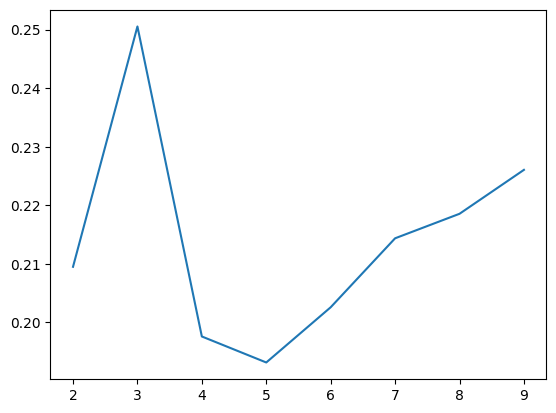

In [46]:
n_clusters = range(2, 10)

def get_silhouette(cluster_num, X):
    k_means =  KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, k_means.labels_)
    return silhouette

silhouette = []
for cluster in n_clusters:
    silhouette.append(get_silhouette(cluster, X_norm))
    
sns.lineplot(y=silhouette, x=n_clusters)

Задание 7.6


Теперь реализуем непосредственно кластеризацию k-means с оптимальным количеством кластеров, которое мы определили в предыдущем задании.

Сколько человек оказалось в самой малочисленной группе?

In [47]:
km = KMeans(n_clusters=3, random_state=42)

bank['cluster_km'] = km.fit_predict(X_norm)
bank['cluster_km'].value_counts()

0    6118
1    1597
2    1235
Name: cluster_km, dtype: int64

Задание 7.7

Попробуем применить DBSCAN. Для начала реализуйте его с параметрами по умолчанию.

Сколько кластеров было выделено?

In [52]:
db = DBSCAN()

bank['cluster_dbscan'] = db.fit_predict(X_norm)
bank['cluster_dbscan'].max()

37

Задание 7.8


В предыдущем задании получилось очень много кластеров. Возможно, это случилось потому, что мы взяли параметры по умолчанию, а результат алгоритма DBSCAN, как вы помните, очень чувствителен к ним.

Давайте попробуем с помощью цикла перебрать параметр eps по значениям, заданным как np.arange(0.1,3,0.2), а параметр min_samples — по значениям, заданным как range(1,20,4). Найдите комбинацию, которая даёт максимальное значение коэффициента силуэта.

In [59]:
eps_values = np.arange(0.1, 3, 0.2)
min_samples = range(1,20,4)

best_silhouette = 0
for eps in eps_values:
    for sample in min_samples:
        db =  DBSCAN(
            eps=eps, 
            min_samples=sample)
        db.fit(X_norm)
        silhouette = silhouette_score(X_norm, db.labels_)
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_eps = eps
            best_sample = sample

print(f'Best silhouette: {best_silhouette}, best eps: {best_eps}, best sample: {best_sample}')


Best silhouette: 0.6173453608696496, best eps: 2.900000000000001, best sample: 5


Задание 7.9

Теперь давайте реализуем агломеративную иерархическую кластеризацию. Переберите количество кластеров в диапазоне от 3 до 9 включительно и найдите то их число, которое будет давать максимальный коэффициент силуэта.

<AxesSubplot: >

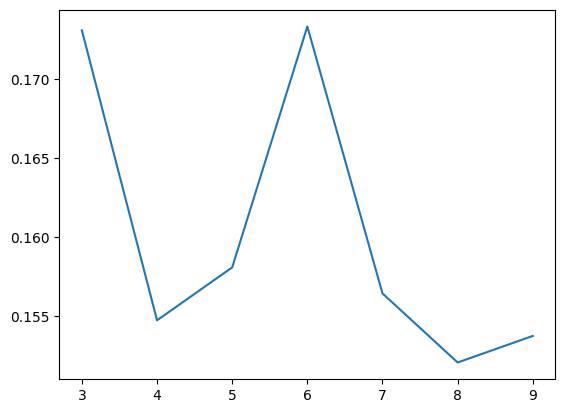

In [62]:
n_clusters = range(3, 10)

def get_silhouette(cluster_num, X):
    agg_cluster =  AgglomerativeClustering(n_clusters=cluster_num)
    agg_cluster.fit(X)
# подсчитаем метрику силуэта, передав данные и то, к каким кластерам относятся объекты
    silhouette = silhouette_score(X, agg_cluster.labels_)
    return silhouette

silhouette = []
for cluster in n_clusters:
    silhouette.append(get_silhouette(cluster, X_norm))
    
sns.lineplot(y=silhouette, x=n_clusters)

Задание 7.10

Сколько будет наблюдений в самом многочисленном классе, если мы обучим на наших данных модель агломеративной иерархической кластеризации с количеством кластеров, полученным в предыдущем задании?

In [63]:
agg = AgglomerativeClustering(n_clusters=6)

bank['cluster_agg'] = agg.fit_predict(X_norm)
bank['cluster_agg'].value_counts()

0    3946
1    2931
2     864
5     722
3     464
4      23
Name: cluster_agg, dtype: int64

Давайте визуализируем результаты кластеризации k-means, отобразив два признака — количество покупок и кредитный лимит:

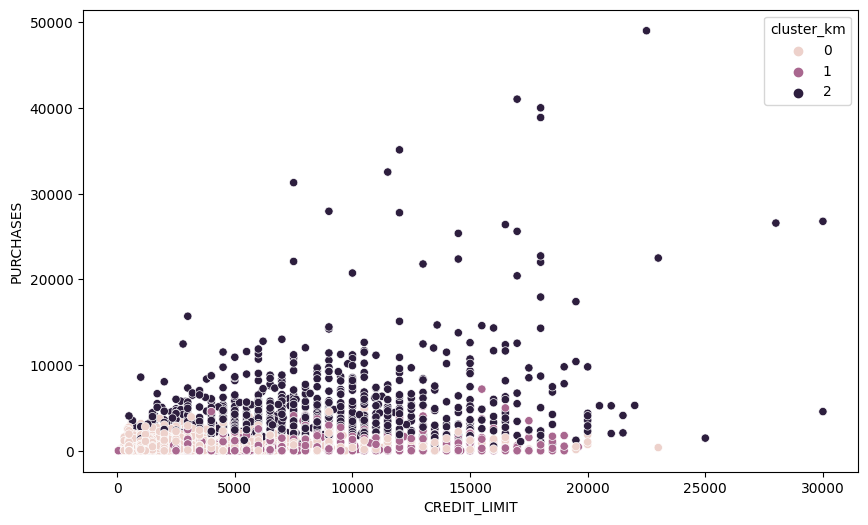

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=bank, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_km')
plt.show()

Мы видим, что практически все точки очень плотно сконцентрированы вместе, так что наши результаты с другими алгоритмами вполне предсказуемы.

С точки зрения интерпретации на графике явно выделяется группа тех, кто совершает много покупок по кредитной карте, и тех, кто совершает их меньше и имеет меньший кредитный лимит.

Но, разумеется, это лишь приблизительная интерпретация, ведь качественного разбиения с помощью большинства методов мы так и не получили, а кроме того, здесь мы видим лишь два признака из многих, на основе которых осуществлялась кластеризация.

Такая проблема с выделением кластеров часто возникает с данными, в которых много признаков. Для того чтобы её решить, можно, например, применять снижение размерности — в следующем модуле мы как раз поработаем с соответствующими методами и научимся преодолевать такие ситуации.

⭐ А пока поздравляем вас — вы полностью изучили методы кластеризации, и теперь осталось лишь немного повторить пройденное в итоговом юните →
